<a href="https://colab.research.google.com/github/DmitryPavlyuk/ai-aviation-engineering/blob/main/02.PredictiveMaintenance/presentation2.1.NASA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. NASA Turbofan Jet Engine Data Set

Module: Artificial Intelligence for Aviation Engineering

Instructor: prof. Dmitry Pavlyuk

# Data Set

CMAPSS Jet Engine Simulated Data

https://data.nasa.gov/Aerospace/CMAPSS-Jet-Engine-Simulated-Data/ff5v-kuh6/about_data


Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. There are three operational settings that have a substantial effect on engine performance.

In [2]:
!wget -O CMAPSS.zip "https://data.nasa.gov/download/ff5v-kuh6/application.zip"

--2024-10-07 16:47:49--  https://data.nasa.gov/download/ff5v-kuh6/application.zip
Resolving data.nasa.gov (data.nasa.gov)... 128.102.186.77, 2001:4d0:6311:2c05:60b0:5ad8:1210:ea07
Connecting to data.nasa.gov (data.nasa.gov)|128.102.186.77|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.nasa.gov/api/views/ff5v-kuh6/files/680c0016-00ca-47a5-a4b9-e6c9437f8409?filename=CMAPSSData.zip [following]
--2024-10-07 16:47:50--  https://data.nasa.gov/api/views/ff5v-kuh6/files/680c0016-00ca-47a5-a4b9-e6c9437f8409?filename=CMAPSSData.zip
Reusing existing connection to data.nasa.gov:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘CMAPSS.zip’

CMAPSS.zip              [        <=>         ]  11.85M  6.16MB/s    in 1.9s    

2024-10-07 16:47:52 (6.16 MB/s) - ‘CMAPSS.zip’ saved [12425978]



In [4]:
!unzip CMAPSS.zip -d CMAPSS

Archive:  CMAPSS.zip
  inflating: CMAPSS/Damage Propagation Modeling.pdf  
  inflating: CMAPSS/readme.txt       
  inflating: CMAPSS/RUL_FD001.txt    
  inflating: CMAPSS/RUL_FD002.txt    
  inflating: CMAPSS/RUL_FD003.txt    
  inflating: CMAPSS/RUL_FD004.txt    
  inflating: CMAPSS/test_FD001.txt   
  inflating: CMAPSS/test_FD002.txt   
  inflating: CMAPSS/test_FD003.txt   
  inflating: CMAPSS/test_FD004.txt   
  inflating: CMAPSS/train_FD001.txt  
  inflating: CMAPSS/train_FD002.txt  
  inflating: CMAPSS/train_FD003.txt  
  inflating: CMAPSS/train_FD004.txt  


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')

In [7]:
column_names = ['engine', 'time', 'op_setting_1', 'op_setting_2',
                'op_setting_3'] + [f'sm_{i}' for i in range(1, 22)]
Sensor_dictionary={}
dict_list=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]

i=1
for x in dict_list :
    Sensor_dictionary[f'sm_{i}']=x
    i+=1
Sensor_dictionary

{'sm_1': '(Fan inlet temperature) (◦R)',
 'sm_2': '(LPC outlet temperature) (◦R)',
 'sm_3': '(HPC outlet temperature) (◦R)',
 'sm_4': '(LPT outlet temperature) (◦R)',
 'sm_5': '(Fan inlet Pressure) (psia)',
 'sm_6': '(bypass-duct pressure) (psia)',
 'sm_7': '(HPC outlet pressure) (psia)',
 'sm_8': '(Physical fan speed) (rpm)',
 'sm_9': '(Physical core speed) (rpm)',
 'sm_10': '(Engine pressure ratio(P50/P2)',
 'sm_11': '(HPC outlet Static pressure) (psia)',
 'sm_12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 'sm_13': '(Corrected fan speed) (rpm)',
 'sm_14': '(Corrected core speed) (rpm)',
 'sm_15': '(Bypass Ratio) ',
 'sm_16': '(Burner fuel-air ratio)',
 'sm_17': '(Bleed Enthalpy)',
 'sm_18': '(Required fan speed)',
 'sm_19': '(Required fan conversion speed)',
 'sm_20': '(High-pressure turbines Cool air flow)',
 'sm_21': '(Low-pressure turbines Cool air flow)'}

In [29]:
data_val = pd.read_csv('CMAPSS/test_FD001.txt' , sep = ' ' , header=None,names=column_names,index_col=False )
data_train = pd.read_csv('CMAPSS/train_FD001.txt' , sep = ' ' , header=None, names=column_names, index_col=False )
y_val = pd.read_csv('CMAPSS/RUL_FD001.txt' , header=None , names=['RUL'] )

<ipython-input-29-efd5d01a6cd4>:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  data_val = pd.read_csv('CMAPSS/test_FD001.txt' , sep = ' ' , header=None,names=column_names,index_col=False )
<ipython-input-29-efd5d01a6cd4>:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  data_train = pd.read_csv('CMAPSS/train_FD001.txt' , sep = ' ' , header=None, names=column_names, index_col=False )


In [30]:
print(data_val.shape)
print(data_train.shape)
print(y_val.shape)

(13096, 26)
(20631, 26)
(100, 1)


In [22]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [31]:
df_info = pd.concat ( [data_train.isna().sum() , data_train.nunique() , data_train.dtypes] , axis = 1  )
df_info.columns = ['missing value' , 'number unique value' , 'dtype']
df_info

,missing value,number unique value,dtype
engine,0,100,int64
time,0,362,int64
op_setting_1,0,158,float64
op_setting_2,0,13,float64
op_setting_3,0,1,float64
sm_1,0,1,float64
sm_2,0,310,float64
sm_3,0,3012,float64
sm_4,0,4051,float64
sm_5,0,1,float64


In [51]:
def constant_feature(df):
    constant_feature = []
    for col in df.columns:
            if df[col].nunique() == 1:
                constant_feature.append(col)
    return constant_feature

In [52]:
df = data_train.copy()
df_val = data_val.copy()
print(constant_feature(df))
df.drop(columns=constant_feature(df)  , inplace = True)
df_val.drop(columns=constant_feature(df) , inplace = True)
features = df.drop(columns=['time', 'engine'])

['op_setting_3', 'sm_1', 'sm_5', 'sm_10', 'sm_16', 'sm_18', 'sm_19']


In [53]:
df['rul'] = df.groupby('engine')['time'].transform('max') - df['time']

In [54]:
df_corr = df.corr()
df_corr

,engine,time,op_setting_1,op_setting_2,sm_2,sm_3,sm_4,sm_6,sm_7,sm_8,sm_9,sm_11,sm_12,sm_13,sm_14,sm_15,sm_17,sm_20,sm_21,rul
engine,1.000000,0.078753,-0.017895,-0.006197,0.014133,0.012621,0.026116,0.026431,-0.032073,0.039929,-0.052053,0.024707,-0.031882,0.044230,-0.059473,0.022486,0.013513,-0.020589,-0.016465,0.078753
time,0.078753,1.000000,-0.004527,0.016132,0.549898,0.543947,0.624577,0.105980,-0.595914,0.475977,0.443999,0.634385,-0.611354,0.477523,0.370324,0.588676,0.566995,-0.583597,-0.585923,-0.736241
op_setting_1,-0.017895,-0.004527,1.000000,0.011660,0.009030,-0.005651,0.009544,-0.001340,-0.009437,-0.000427,-0.004279,0.011658,-0.001491,0.002318,-0.004469,0.007652,0.002599,-0.005713,-0.014559,-0.003198
op_setting_2,-0.006197,0.016132,0.011660,1.000000,0.007266,0.009068,0.014673,0.014355,-0.016678,0.013285,-0.005425,0.011690,-0.010923,0.018156,-0.006310,0.014156,0.012280,-0.010554,-0.007846,-0.001948
sm_2,0.014133,0.549898,0.009030,0.007266,1.000000,0.602610,0.714949,0.132242,-0.702136,0.662325,0.273764,0.740020,-0.724578,0.661792,0.179752,0.675975,0.629886,-0.661841,-0.668050,-0.606484
sm_3,0.012621,0.543947,-0.005651,0.009068,0.602610,1.000000,0.678413,0.116039,-0.664595,0.602481,0.322964,0.695900,-0.680307,0.600963,0.237137,0.639921,0.600017,-0.625941,-0.633901,-0.584520
sm_4,0.026116,0.624577,0.009544,0.014673,0.714949,0.678413,1.000000,0.150480,-0.793130,0.746852,0.297429,0.830136,-0.815591,0.745158,0.190748,0.758459,0.703499,-0.748067,-0.745193,-0.678948
sm_6,0.026431,0.105980,-0.001340,0.014355,0.132242,0.116039,0.150480,1.000000,-0.155720,0.152161,0.019347,0.160014,-0.155884,0.158276,-0.002112,0.149042,0.130810,-0.141419,-0.137419,-0.128348
sm_7,-0.032073,-0.595914,-0.009437,-0.016678,-0.702136,-0.664595,-0.793130,-0.155720,1.000000,-0.767132,-0.217835,-0.822805,0.812713,-0.764611,-0.110053,-0.747051,-0.692893,0.736163,0.737447,0.657223
sm_8,0.039929,0.475977,-0.000427,0.013285,0.662325,0.602481,0.746852,0.152161,-0.767132,1.000000,-0.032091,0.782213,-0.786540,0.826084,-0.144787,0.700949,0.627785,-0.687030,-0.688840,-0.563968


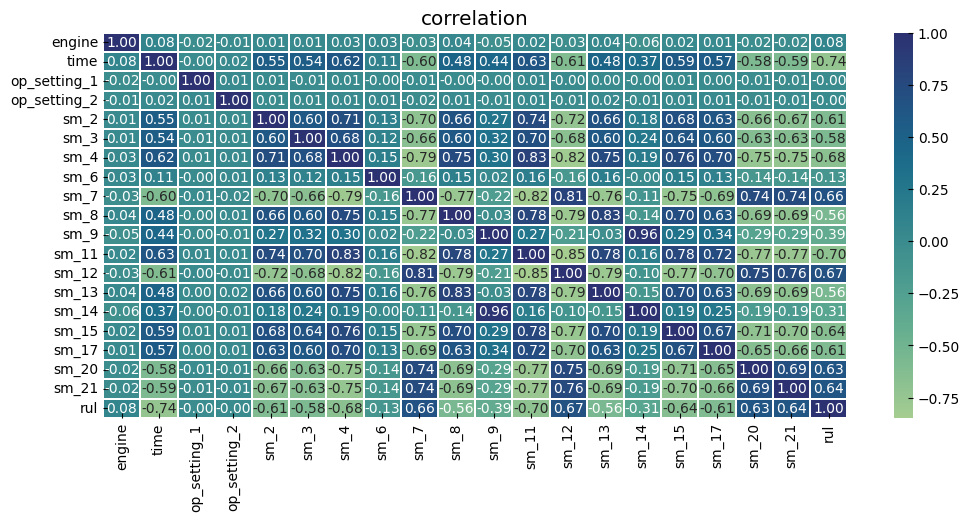

In [55]:
plt.figure(figsize = (12,5))
plt.grid() , plt.title('correlation')
sns.heatmap(df_corr , annot=True , fmt = '0.2f' , cmap='crest' , linewidths=0.01);

In [56]:
data_train['time'].describe().T

,time
count,20631.000000
mean,108.807862
std,68.880990
min,1.000000
25%,52.000000
50%,104.000000
75%,156.000000
max,362.000000


In [57]:
failure_time = df.groupby('engine')['rul'].max()

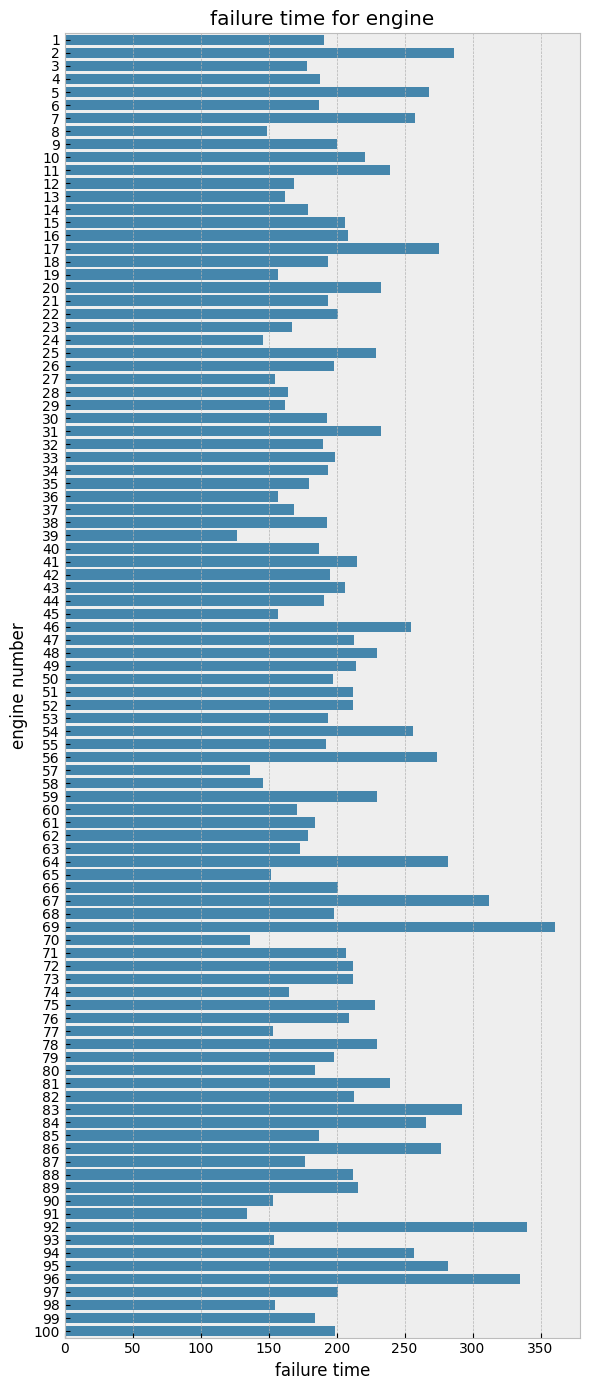

In [58]:
plt.figure(figsize = (6,14))
sns.barplot(y = failure_time.index , x = failure_time.values , orient='h')
plt.title('failure time for engine')
plt.xlabel('failure time')
plt.ylabel('engine number')
plt.tight_layout()
plt.show();

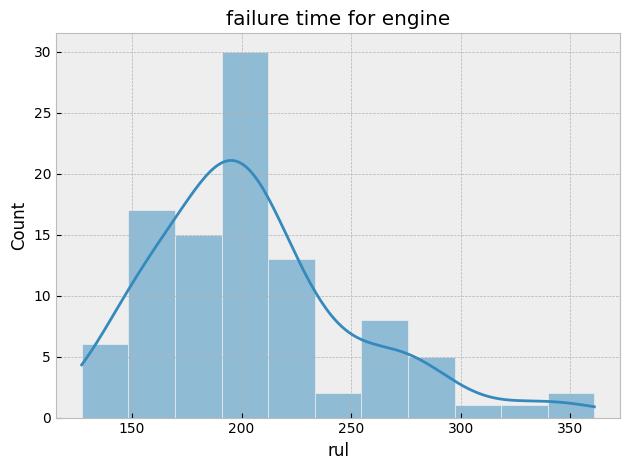

In [59]:
sns.histplot(failure_time , kde=True)
plt.title('failure time for engine')
plt.tight_layout()

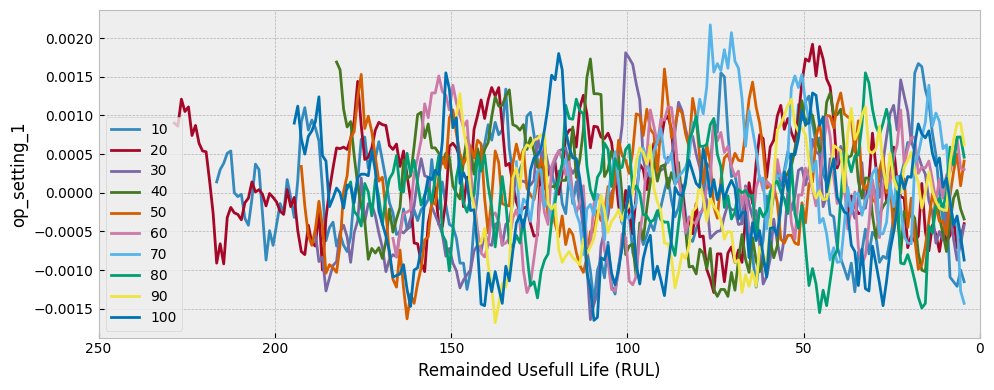

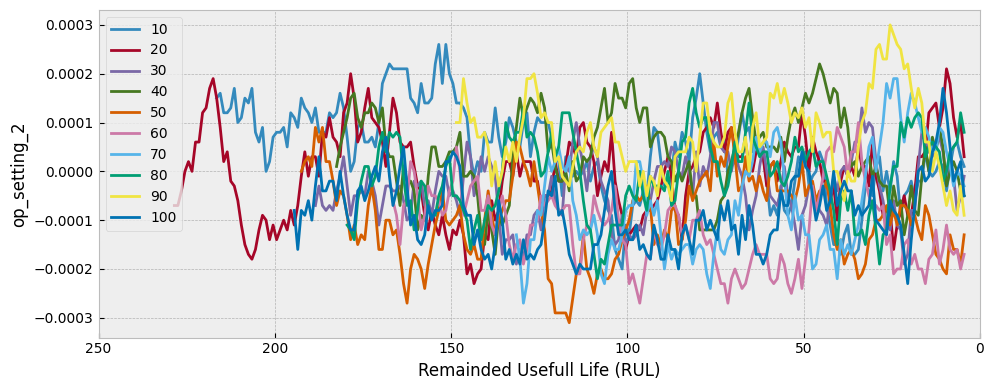

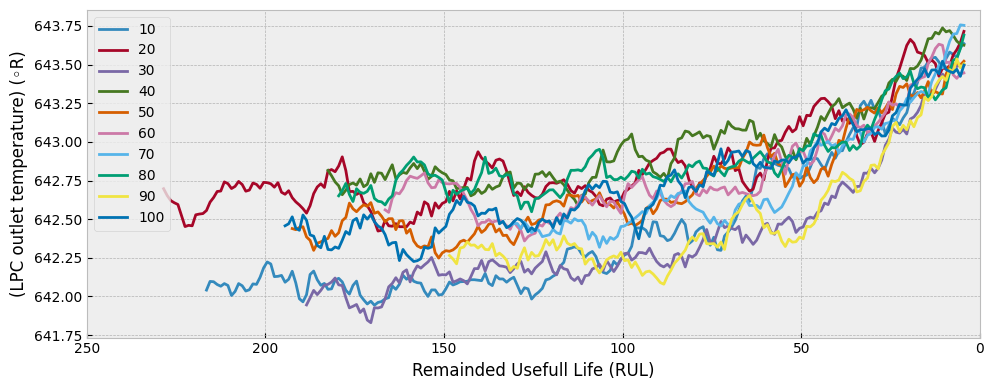

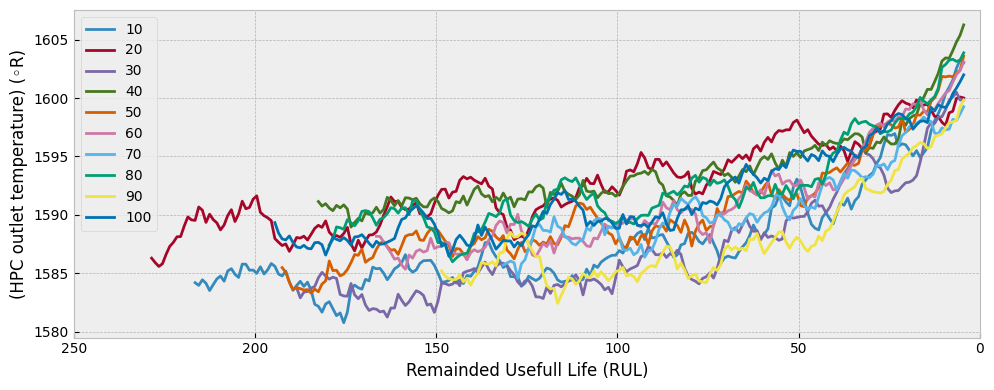

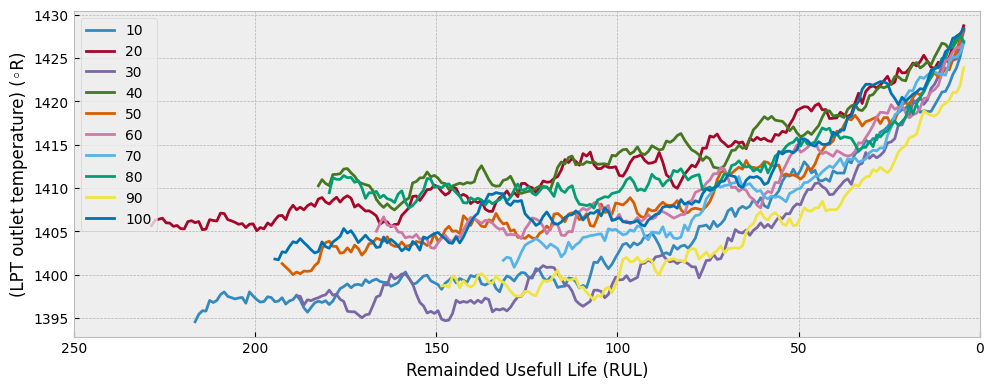

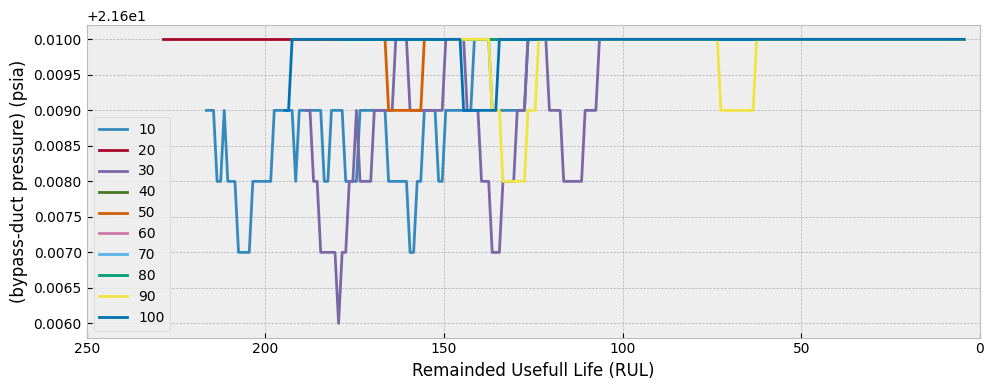

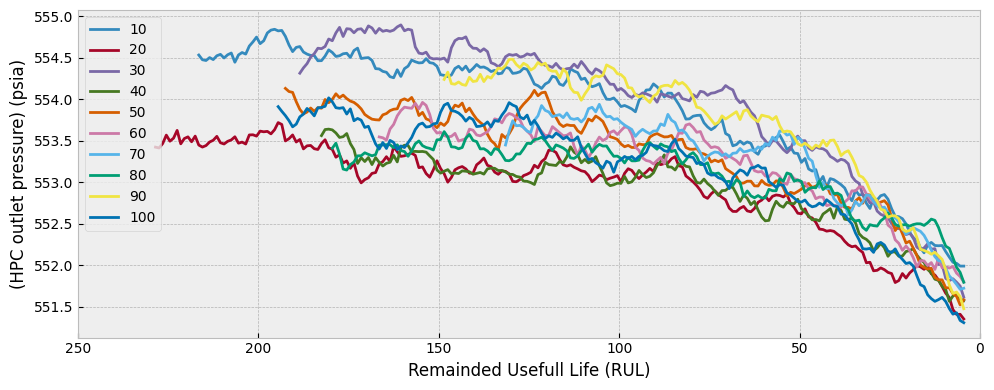

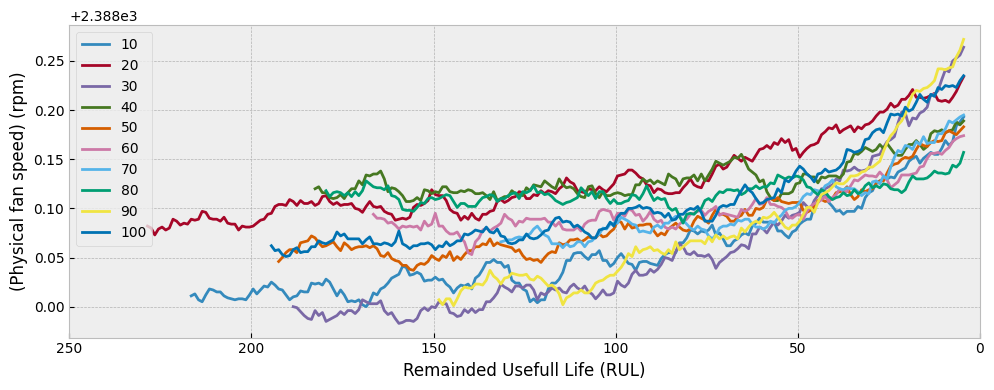

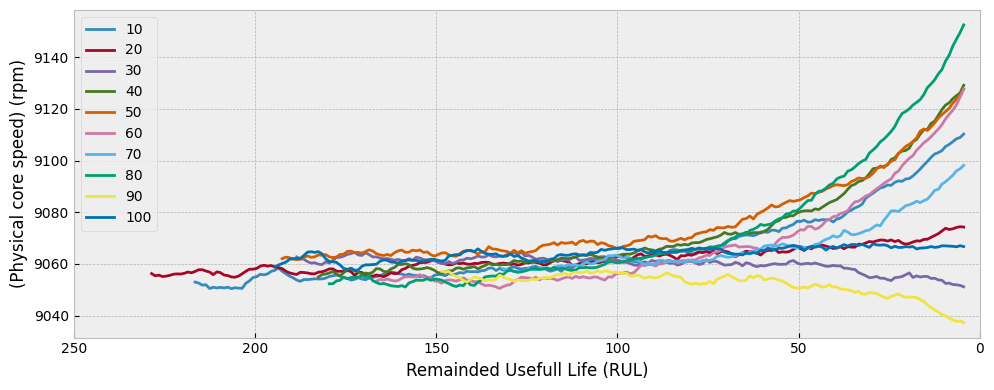

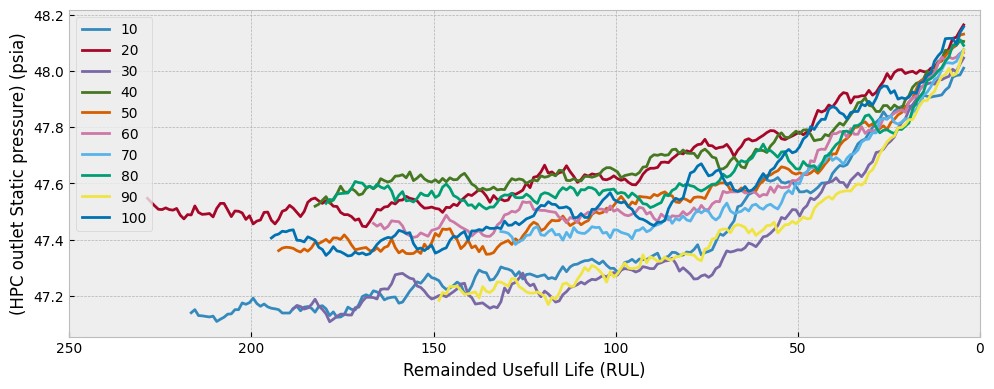

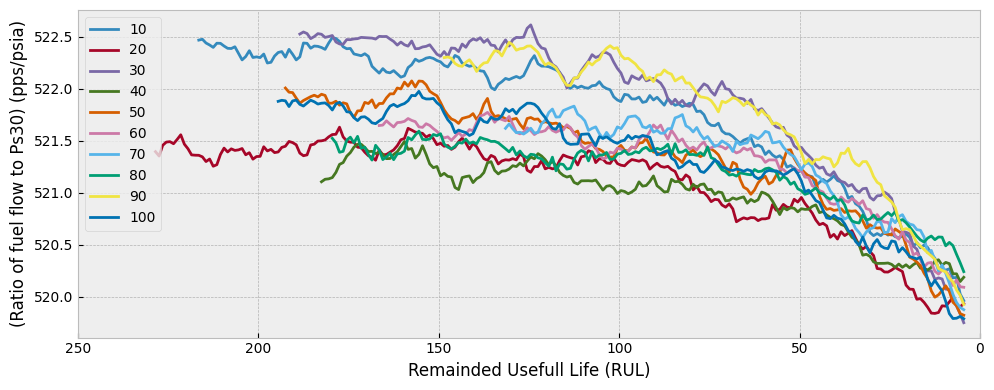

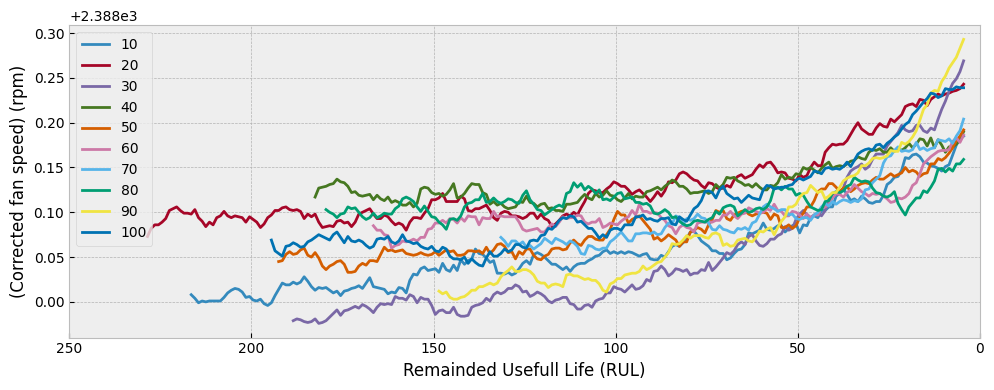

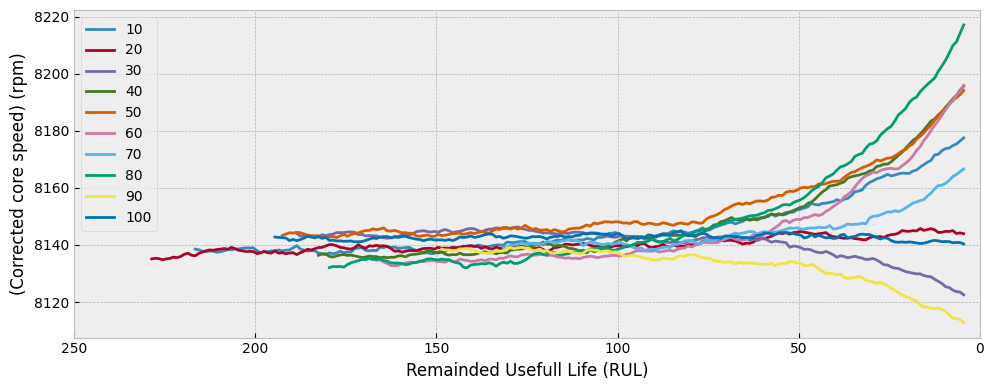

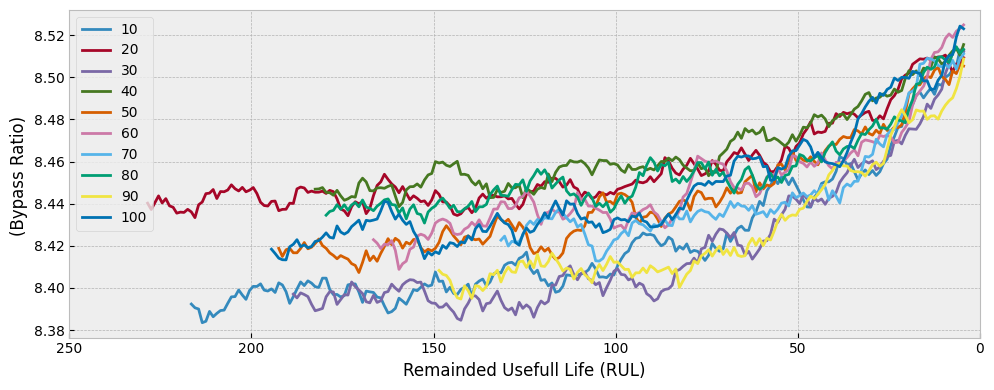

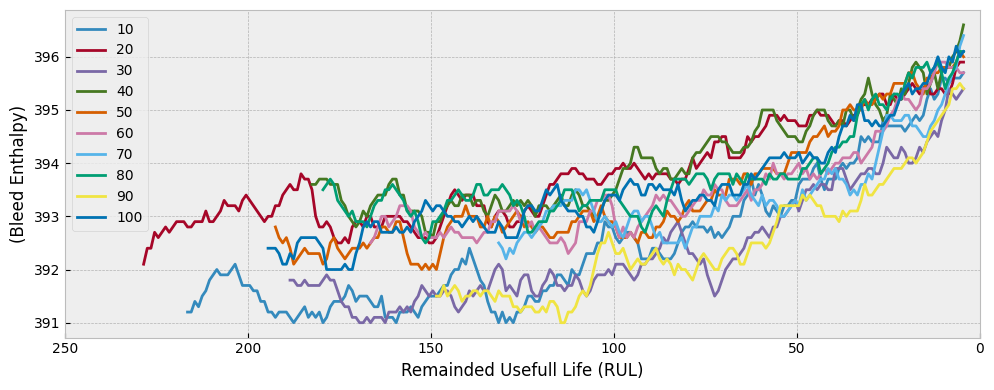

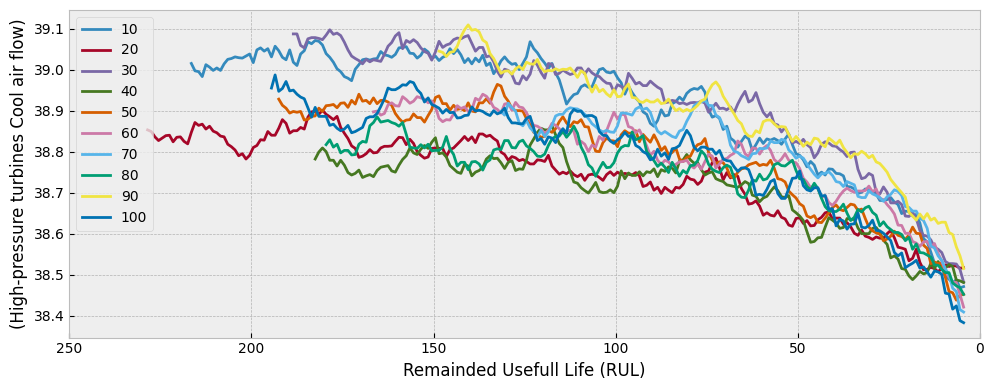

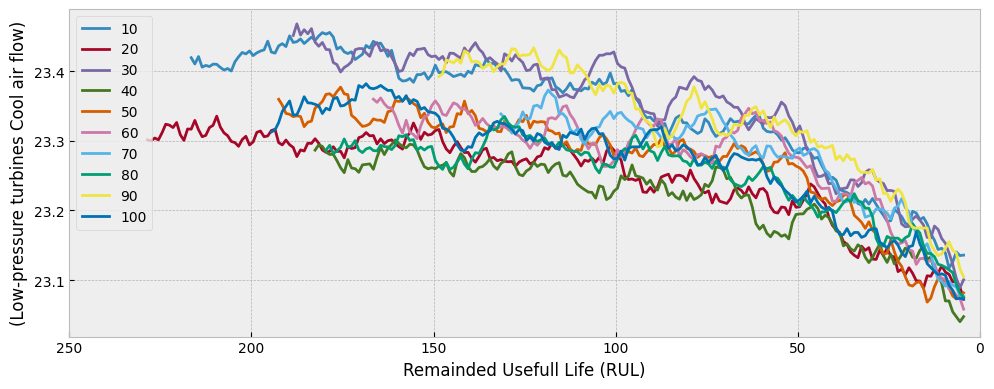

In [67]:

for col in features:
  figure = plt.figure(figsize=(10,4))
  for engine in df['engine'].unique():
      if (engine % 10 ==0 ):
          rolling_window = df[ df['engine']==engine ].rolling(10).mean()
          sns.lineplot(data = rolling_window, x = 'rul' , y =col, label =engine)
  plt.tight_layout(), plt.xlim(250 , 0)
  plt.xlabel('Remainded Usefull Life (RUL)') , plt.ylabel(Sensor_dictionary.get(col,col))
  plt.show()

In [ ]:
df

# Thank you